<a href="https://colab.research.google.com/github/sandhiya0147/Data_Science/blob/main/LinearRegressionmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK ASSIGNMENT 2**

"Predicting Ice Sales Revenue Based on Temperature"


1.Import Libraries:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

2.Load Dataset:

In [2]:
df=pd.read_csv('/content/Ice Cream.csv')

3.Understanding the Structure of the Dataset:

In [19]:
df.info()
print("\nDataset Head:\n", df.head())
print("\nDataset Tail:\n", df.tail())
print("\nDataset Description:\n", df.describe())
print("\nMissing values:\n",df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB

Dataset Head:
    Temperature  Revenue
0         24.6      535
1         26.1      626
2         27.8      661
3         20.6      488
4         11.6      317

Dataset Tail:
      Temperature  Revenue
495         22.3      525
496         32.9      756
497         12.6      307
498         22.4      567
499         29.0      656

Dataset Description:
        Temperature      Revenue
count   500.000000   500.000000
mean     22.281600   522.058000
std       8.097597   175.410399
min       0.000000    10.000000
25%      17.175000   406.000000
50%      22.400000   530.000000
75%      27.800000   643.000000
max      45.000000  1000.000000

Missing values:
 Temperature    0


4.Visual Analysis:

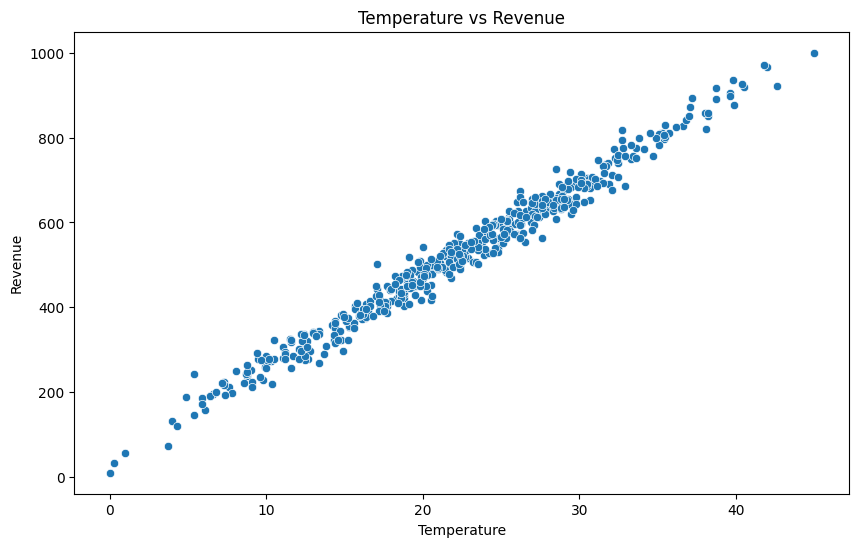

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Temperature', y='Revenue', data=df)
plt.title('Temperature vs Revenue')
plt.show()

5.Correlation between temperature and revenue:

In [21]:
print(f"Correlation: {df.corr().iloc[0,1]:.2f}")

Correlation: 0.99


6.Model Building:

**Linear Regression:**

In [23]:
X = df[['Temperature']]
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

7.Performance Evaluation:

In [25]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 25.54
MAE: 19.20
R² Score: 0.98


     Visual Representation:

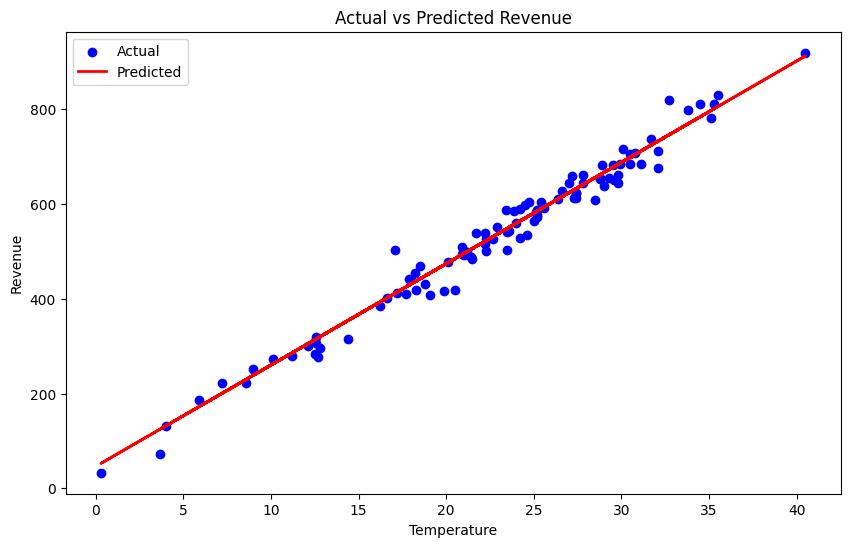

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Actual vs Predicted Revenue')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.legend()
plt.show()

8.Target Variable: Revenue(USD)

In [27]:
print(f"Revenue = {model.intercept_:.2f} + {model.coef_[0]:.2f}*Temperature")

Revenue = 46.18 + 21.38*Temperature


In [29]:
temperature = 25
revenue = model.predict([[temperature]])[0]
print(f"Predicted Revenue at {temperature}°C: ${revenue:.2f}")

Predicted Revenue at 25°C: $580.78


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
